In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from os.path import abspath, join
import sys
root_dir = abspath(join('..'))
sys.path.append(root_dir)
from glob import glob
import vaex
from datetime import datetime
import json
import matplotlib.pyplot as plt
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import style

style()

In [4]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

## thin

In [45]:
def get_bf(path):
    files = glob(join(path, "*.json")) 
    files.sort()
    ns  = []
    dm = []
    e_dm = []
    bic = []
    aic = []
    for file in files:
        stats = json.load(open(file))
        n = int(stats["name"])
        log_bf = stats['log_bf']
        e_log_bf = stats['e_log_bf']
        ns.append(n)
        dm.append(log_bf)
        e_dm.append(e_log_bf)
        bic.append(stats['bic'])
        aic.append(stats['aic'])
    return ns, dm, e_dm, bic, aic

t = 'thin'
stats_dir = join(root_data_dir, "MCMC-mock", t, "dm", "stats")
ns, dm, e_dm, bic_dm, aic_dm = get_bf(stats_dir)

stats_dir = join(root_data_dir, "MCMC-mock", t, "dddm", "stats")
ns, dddm, e_dddm, bic_dddm, aic_dddm = get_bf(stats_dir)

stats_dir = join(root_data_dir, "MCMC-mock", t, "no", "stats")
ns, no, e_no, bic_no, aic_no = get_bf(stats_dir)

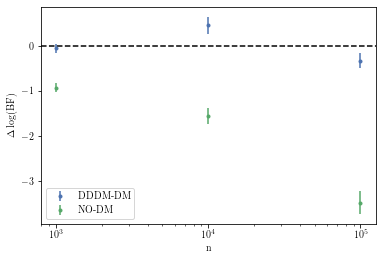

In [46]:
dm_dddm = np.array(dddm) - np.array(dm) 
e_dm_dddm = np.sqrt(np.array(e_dm)**2 + np.array(e_dddm)**2)
dm_no = np.array(no) - np.array(dm)
e_dm_no = np.sqrt(np.array(e_dm)**2 + np.array(e_no)**2)

plt.errorbar(ns, dm_dddm, yerr=e_dm_dddm, fmt='.', label='DDDM-DM')
plt.errorbar(ns, dm_no, yerr=e_dm_no, fmt='.', label='NO-DM')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('n')
plt.ylabel(r'$\Delta \log$(BF)')
plt.legend()
plt.xscale('log')
plt.savefig(join("img", f"bf_{t}.pdf"), dpi=dpi)
plt.show()

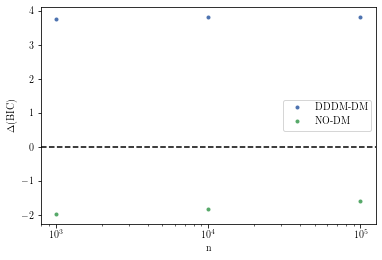

In [41]:
bic_dddm_dm = np.array(bic_dddm) - np.array(bic_dm)
bic_no_dm = np.array(bic_no) - np.array(bic_dm)

plt.plot(ns, bic_dddm_dm, '.', label='DDDM-DM')
plt.plot(ns, bic_no_dm, '.', label='NO-DM')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('n')
plt.ylabel(r'$\Delta$(BIC)')
plt.legend()
plt.xscale('log')
plt.show()

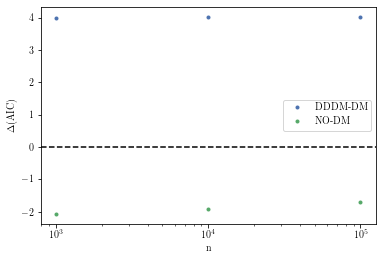

In [40]:
aic_dddm_dm = np.array(aic_dddm) - np.array(aic_dm)
aic_no_dm = np.array(aic_no) - np.array(aic_dm)

plt.plot(ns, aic_dddm_dm, '.', label='DDDM-DM')
plt.plot(ns, aic_no_dm, '.', label='NO-DM')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('n')
plt.ylabel(r'$\Delta$(AIC)')
plt.legend()
plt.xscale('log')
plt.show()

In [47]:
dm_dddm, dm_no

(array([-0.03818483,  0.47441321, -0.31475163]),
 array([-0.91561519, -1.5463256 , -3.4737783 ]))

In [32]:
def get_pred(path):
    files = glob(join(path, "*.json")) 
    files.sort()
    ns  = []
    dm = []
    for file in files:
        stats = json.load(open(file))
        n = int(stats["name"])
        pred = stats['predictive_posterior']
        ns.append(n)
        dm.append(pred)
    return ns, dm

t = 'thic'
stats_dir = join(root_data_dir, "MCMC-mock", t, "dm", "stats")
ns, dm = get_pred(stats_dir)

stats_dir = join(root_data_dir, "MCMC-mock", t, "dddm", "stats")
ns, dddm = get_pred(stats_dir)

stats_dir = join(root_data_dir, "MCMC-mock", t, "no", "stats")
ns, no = get_pred(stats_dir)

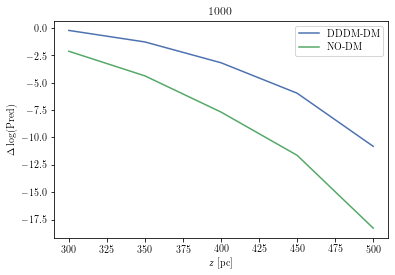

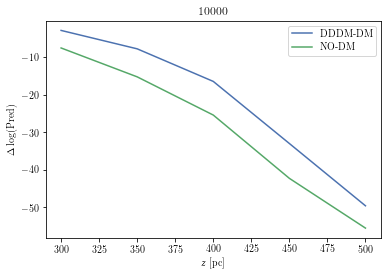

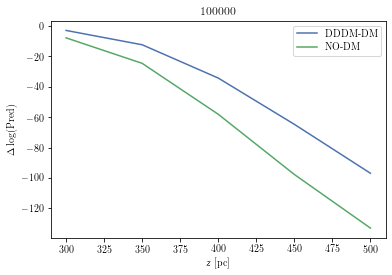

In [33]:
for n, dm_i, dddm_i, no_i in zip(ns, dm, dddm, no):
    pred_dm = []
    pred_dddm = []
    pred_no = []
    zs = []
    for p_dm, p_dddm, p_no in zip(dm_i, dddm_i, no_i):
        z, v_dm = p_dm
        z, v_dddm = p_dddm
        z, v_no = p_no
        zs.append(z)
        pred_dm.append(v_dm)
        pred_dddm.append(v_dddm)
        pred_no.append(v_no)
    pred_no_dm = np.array(pred_no) - np.array(pred_dm)
    pred_dddm_dm = np.array(pred_dddm) - np.array(pred_dm)
    plt.plot(zs, pred_dddm_dm, label='DDDM-DM')
    plt.plot(zs, pred_no_dm, label='NO-DM')
    # plt.plot(zs, pred_dm, label='DM')
    # plt.plot(zs, pred_dddm, label='DDDM')
    # plt.plot(zs, pred_no, label='NO')
    plt.title(n)
    plt.xlabel('$z$ [pc]')
    plt.ylabel(r'$\Delta \log$(Pred)')
    plt.legend()
    plt.savefig(join("img", f"pred_{t}_{n}.pdf"), dpi=dpi)
    plt.show()


# asli

In [5]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries

array([[-0.019     ,  0.12713703],
       [ 0.12713703,  0.19024014],
       [ 0.19024014,  0.22021412],
       [ 0.22021412,  0.24230021],
       [ 0.24230021,  0.26004796],
       [ 0.26004796,  0.27621813],
       [ 0.27621813,  0.28923315],
       [ 0.28923315,  0.30106498],
       [ 0.30106498,  0.31329121],
       [ 0.31329121,  0.32512304],
       [ 0.32512304,  0.3353773 ],
       [ 0.3353773 ,  0.34523716],
       [ 0.34523716,  0.35509702],
       [ 0.35509702,  0.36535128],
       [ 0.36535128,  0.37402796]])

In [6]:
c0 = boundaries[:, 0]
c1 = boundaries[:, 1]

c = (c0 + c1) / 2

In [8]:
def get_bf(path):
    files = glob(join(path, "*.json")) 
    files.sort()
    ns  = []
    dm = []
    e_dm = []
    bic = []
    aic = []
    for file in files:
        stats = json.load(open(file))
        log_bf = stats['log_bf']
        e_log_bf = stats['e_log_bf']
        dm.append(log_bf)
        e_dm.append(e_log_bf)
    return dm, e_dm

stats_dir = join(root_data_dir, "MCMC-no", "dm", "stats")
dm, e_dm = get_bf(stats_dir)

stats_dir = join(root_data_dir, "MCMC-no", "dddm", "stats")
dddm, e_dddm = get_bf(stats_dir)

stats_dir = join(root_data_dir, "MCMC-no", "no", "stats")
no, e_no = get_bf(stats_dir)

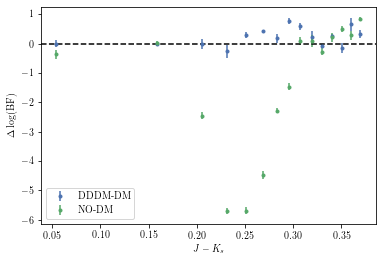

In [16]:
dm_dddm = np.array(dddm) - np.array(dm) 
e_dm_dddm = np.sqrt(np.array(e_dm)**2 + np.array(e_dddm)**2)
dm_no = np.array(no) - np.array(dm)
e_dm_no = np.sqrt(np.array(e_dm)**2 + np.array(e_no)**2)

plt.errorbar(c, dm_dddm, yerr=e_dm_dddm, fmt='.', label='DDDM-DM')
plt.errorbar(c, dm_no, yerr=e_dm_no, fmt='.', label='NO-DM')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel(r'$J-K_s$')
plt.ylabel(r'$\Delta \log$(BF)')
plt.legend(loc='lower left')
# plt.xscale('log')
plt.savefig(join("img", f"bf.pdf"), dpi=70)
plt.show()

In [24]:
def get_pred(path):
    files = glob(join(path, "*.json")) 
    files.sort()
    dm = []
    for file in files:
        stats = json.load(open(file))
        pred = stats['predictive_posterior']
        dm.append(pred)
    return np.array(dm)

stats_dir = join(root_data_dir, "MCMC-no", "dm", "stats")
pred_dm = get_pred(stats_dir)

stats_dir = join(root_data_dir, "MCMC-no", "dddm", "stats")
pred_dddm = get_pred(stats_dir)

stats_dir = join(root_data_dir, "MCMC-no", "no", "stats")
pred_no = get_pred(stats_dir)
pred_no

array([-13.10008682, -25.37680407, -20.27973582, -19.6242022 ,
       -20.20488146, -33.88088934, -22.72740942, -21.58698332,
       -36.00773413, -37.27165216, -29.43132435, -44.8896082 ,
       -31.56651125, -29.72203898, -31.83286626])

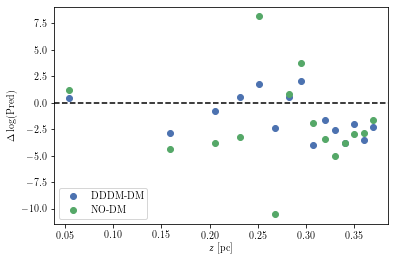

In [33]:
pred_no_dm = pred_no - pred_dm
pred_dddm_dm = pred_dddm - pred_dm
plt.scatter(c, pred_dddm_dm, label='DDDM-DM')
plt.scatter(c, pred_no_dm, label='NO-DM')
plt.axhline(0, color='k', linestyle='--')
# plt.plot(zs, pred_dm, label='DM')
# plt.plot(zs, pred_dddm, label='DDDM')
# plt.plot(zs, pred_no, label='NO')
plt.xlabel('$z$ [pc]')
plt.ylabel(r'$\Delta \log$(Pred)')
plt.legend(loc='lower left')
plt.savefig(join("img", f"pred.pdf"), dpi=70)
plt.show()